In [18]:
import scipy.io as sio
import numpy as np
    data = sio.loadmat('2-Class Problem.mat')

In [4]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Training_class1', 'Training_class2', 'Testing', 'Label_Testing'])


    以下为代码：

In [20]:
class1_data = np.array(data['Training_class1'])

In [21]:
class2_data = np.array(data['Training_class2'])

In [25]:
print(class1_data,type(class1_data),class1_data.shape)
print(class2_data,type(class2_data),class2_data.shape)

[[54 69 54 ... 51 34 68]
 [88 67 57 ... 73 41 52]
 [65 82 66 ... 32 39 32]
 ...
 [77 56 52 ... 32 43 25]
 [68 76 88 ... 26 65 43]
 [44 49 51 ...  3 36 13]] <class 'numpy.ndarray'> (190, 647)
[[137 122 135 ... 135 120 137]
 [122 143 132 ... 133 133 145]
 [147 134 146 ... 131 123 110]
 ...
 [151 103 117 ... 135 151 157]
 [158 110 105 ... 144 121 133]
 [137 145 122 ... 142 132 145]] <class 'numpy.ndarray'> (190, 717)


In [26]:
def Expected_value(data):#计算期望
    num = data.shape[1] #样本个数
    data1 = [data[:,i] for i in range(data.shape[1])]
    data1 = np.sum(data1, axis=0, keepdims=True) / num
    return data1


In [29]:
def Covariance_matrix(X): #计算协方差矩阵
    num = X.shape[1]
    X_e = Expected_value(X) #期望
    X_T = X.T
    X_T = [X_T[i, :].reshape(-1, 1) for i in range(X_T.shape[0])]
    X1 = [X[:,i] for i in range(X.shape[1])]
    X_sum = []
    for x, x_T in zip(X1, X_T):
        X_sum.append(x * x_T)
    return np.sum(X_sum,axis=0) / num - X_e.reshape(X.shape[0],1) * X_e.reshape(1,X.shape[0])

In [43]:
class1_data_mean = Expected_value(class1_data)#计算均值
class2_data_mean = Expected_value(class2_data)
class1_data_cm = Covariance_matrix(class1_data)#计算协方差矩阵
class2_data_cm = Covariance_matrix(class2_data)

(1, 190)


    接下来是欧式距离分类器

In [34]:
def gx1(X_mean,X_test): #欧氏距离
    x = X_test.reshape(-1,1) - X_mean.reshape(-1,1)
    return np.dot(x.T, x)

In [38]:
test_data = np.array(data['Testing'])
test_data_label = np.array(data['Label_Testing'])

In [41]:
print(test_data.shape,test_data_label.shape,test_data_label)

(190, 1364) (1, 1364) [[1 1 1 ... 2 2 2]]


In [44]:
result = []
for data,label in zip(test_data.T,test_data_label.T):
    class1_length = gx1(class1_data_mean,data)
    class2_length = gx1(class2_data_mean,data)
    if class1_length > class2_length:
        #应该属于二类
        s = 2
    else:
        s = 1
    if s == label:
        result.append(1)
    else:
        result.append(0)

In [45]:
print(result)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [46]:
sum = 0
sum1 = 0
for s in result:
    sum += 1
    if s == 1:
        sum1 += 1
print(sum1/sum)
    
    

0.998533724340176


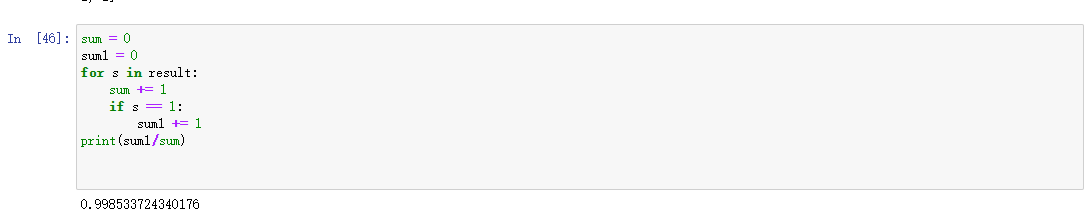准确率达到99.85%!
接下来是马氏距离分类器

In [53]:
def gx2(X_mean, X_cm, X):  # 马氏距离
    x = X.reshape(-1, 1) - X_mean.reshape(-1, 1)
    return np.dot(np.dot(x.T, np.linalg.inv(X_cm)), x)


In [56]:
result = []
for data,label in zip(test_data.T,test_data_label.T):
    class1_length = gx2(class1_data_mean,class1_data_cm,data)
    class2_length = gx2(class2_data_mean,class2_data_cm,data)
    if class1_length > class2_length:
        #应该属于二类
        s = 2
    else:
        s = 1
    if s == label:
        result.append(1)
    else:
        result.append(0)

In [57]:
print(result)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 

In [55]:
sum = 0
sum1 = 0
for s in result:
    sum += 1
    if s == 1:
        sum1 += 1
print(sum1/sum)
    
    

0.48826979472140764


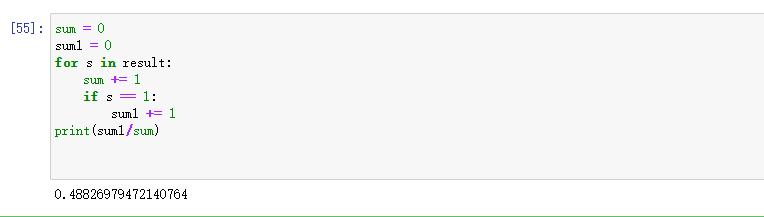
可能是我的方法有误，马氏距离分类效果不好，只有48.82%